In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
data_df = pd.read_csv("Resources/Heart_disease_data.csv")
data_df.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [3]:
data_df.count()

AGE                  68783
GENDER               68783
HEIGHT               68783
WEIGHT               68783
AP_HIGH              68783
AP_LOW               68783
CHOLESTEROL          68783
GLUCOSE              68783
SMOKE                68783
ALCOHOL              68783
PHYSICAL_ACTIVITY    68783
CARDIO_DISEASE       68783
dtype: int64

In [4]:
values_entered = data_df.replace({"GENDER": {1 : "Female", 2 : "Male"}, 
                          "CHOLESTEROL": {1: "Normal", 2: "Above Normal", 3: "High"},
                          "GLUCOSE": {1: "Normal", 2: "Above Normal", 3: "High"},
                          "SMOKE": {0: "Non-Smoker", 1: "Smoker"},
                          "ALCOHOL": {0: "Non-Drinker", 1: "Drinker"},
                          "PHYSICAL_ACTIVITY": {0: "Does not Exercise", 1: "Does Exercise"},
                          "CARDIO_DISEASE": {0: "No Cardio related Diesease", 1: "Evidence of Cardio Disease"}})
values_entered

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,Male,168,62,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease
1,55,Female,156,85,140,90,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
2,52,Female,165,64,130,70,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease
3,48,Male,169,82,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
4,48,Female,156,56,100,60,Normal,Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,Male,168,76,120,80,Normal,Normal,Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease
68779,62,Female,158,126,140,90,Above Normal,Above Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
68780,52,Male,183,105,180,90,High,Normal,Non-Smoker,Drinker,Does not Exercise,Evidence of Cardio Disease
68781,61,Female,163,72,135,80,Normal,Above Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease


In [5]:
values_entered.value_counts("CARDIO_DISEASE")

CARDIO_DISEASE
No Cardio related Diesease    34742
Evidence of Cardio Disease    34041
dtype: int64

In [6]:
values_entered["AGE"].max()

65

In [7]:
height = (values_entered["HEIGHT"]**2)/10000
height

0        2.8224
1        2.4336
2        2.7225
3        2.8561
4        2.4336
          ...  
68778    2.8224
68779    2.4964
68780    3.3489
68781    2.6569
68782    2.8900
Name: HEIGHT, Length: 68783, dtype: float64

In [8]:
values_entered["BMI"] = (values_entered['WEIGHT']/height)
values_entered["BMI"] 

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
68778    26.927438
68779    50.472681
68780    31.353579
68781    27.099251
68782    24.913495
Name: BMI, Length: 68783, dtype: float64

In [9]:
values_entered

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI
0,50,Male,168,62,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease,21.967120
1,55,Female,156,85,140,90,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,34.927679
2,52,Female,165,64,130,70,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,23.507805
3,48,Male,169,82,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,28.710479
4,48,Female,156,56,100,60,Normal,Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,Male,168,76,120,80,Normal,Normal,Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease,26.927438
68779,62,Female,158,126,140,90,Above Normal,Above Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,50.472681
68780,52,Male,183,105,180,90,High,Normal,Non-Smoker,Drinker,Does not Exercise,Evidence of Cardio Disease,31.353579
68781,61,Female,163,72,135,80,Normal,Above Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,27.099251


In [10]:
def ap_check(row):
    if row['AP_HIGH'] >120:
        res = 'High'
    elif row['AP_LOW'] <80:
        res = 'Low'
    else :
        res = 'Normal'
    return res

In [11]:
values_entered['Blood Pressure'] = values_entered.apply(lambda row: ap_check(row), axis=1)


values_entered

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI,Blood Pressure
0,50,Male,168,62,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease,21.967120,Normal
1,55,Female,156,85,140,90,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,34.927679,High
2,52,Female,165,64,130,70,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,23.507805,High
3,48,Male,169,82,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,28.710479,High
4,48,Female,156,56,100,60,Normal,Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease,23.011177,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,Male,168,76,120,80,Normal,Normal,Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease,26.927438,Normal
68779,62,Female,158,126,140,90,Above Normal,Above Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,50.472681,High
68780,52,Male,183,105,180,90,High,Normal,Non-Smoker,Drinker,Does not Exercise,Evidence of Cardio Disease,31.353579,High
68781,61,Female,163,72,135,80,Normal,Above Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,27.099251,High


In [12]:
def bmi_category(row):
    if row<= 18.5:
        res = "Underweight"
    elif row> 18.5 and row< 25:
        res = "Normal"
    elif row> 25 and row< 30:
        res = "OverWeight"
    else:
        res = "Obese"
    return res


values_entered['BMI_range'] = values_entered['BMI'].apply(lambda row: bmi_category(row))

values_entered

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI,Blood Pressure,BMI_range
0,50,Male,168,62,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease,21.967120,Normal,Normal
1,55,Female,156,85,140,90,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,34.927679,High,Obese
2,52,Female,165,64,130,70,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,23.507805,High,Normal
3,48,Male,169,82,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,28.710479,High,OverWeight
4,48,Female,156,56,100,60,Normal,Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease,23.011177,Low,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,Male,168,76,120,80,Normal,Normal,Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease,26.927438,Normal,OverWeight
68779,62,Female,158,126,140,90,Above Normal,Above Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,50.472681,High,Obese
68780,52,Male,183,105,180,90,High,Normal,Non-Smoker,Drinker,Does not Exercise,Evidence of Cardio Disease,31.353579,High,Obese
68781,61,Female,163,72,135,80,Normal,Above Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,27.099251,High,OverWeight


In [13]:
values_entered.describe()

,AGE,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,BMI
count,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000
mean,53.326781,164.361252,74.121934,126.614585,81.381591,27.522793
std,6.768163,8.184850,14.331392,16.763763,9.676679,6.050677
min,30.000000,55.000000,11.000000,60.000000,40.000000,3.471784
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.875115
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.346494
75%,58.000000,170.000000,82.000000,140.000000,90.000000,30.119376
max,65.000000,250.000000,200.000000,240.000000,190.000000,298.666667


In [14]:
values_entered.dtypes



AGE                    int64
GENDER                object
HEIGHT                 int64
WEIGHT                 int64
AP_HIGH                int64
AP_LOW                 int64
CHOLESTEROL           object
GLUCOSE               object
SMOKE                 object
ALCOHOL               object
PHYSICAL_ACTIVITY     object
CARDIO_DISEASE        object
BMI                  float64
Blood Pressure        object
BMI_range             object
dtype: object

Text(0, 0.5, 'Number of Patients')

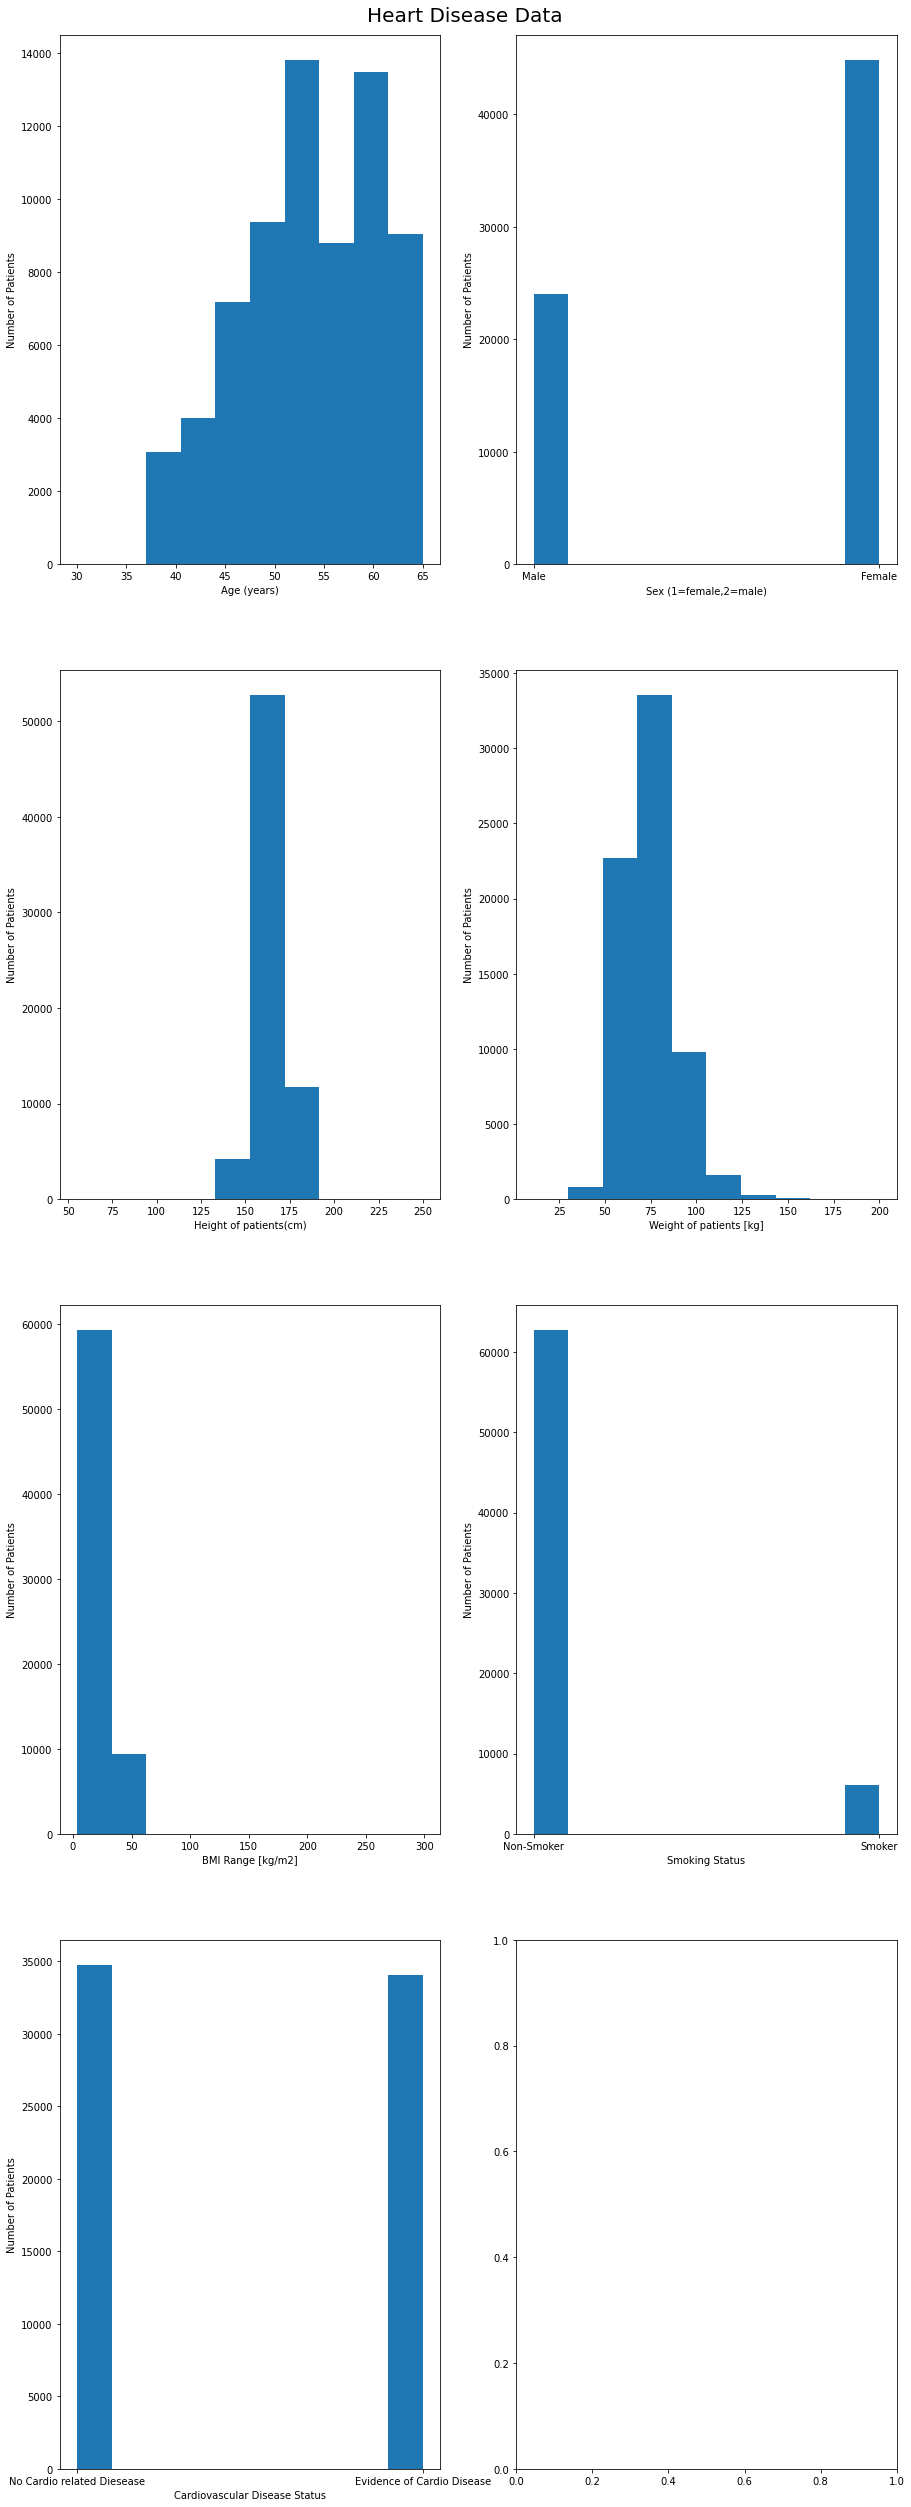

In [15]:
fig, axes = plt.subplots( nrows=4, ncols=2, figsize=(15,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Data", fontsize=20)
axes[0,0].hist(values_entered.AGE)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")
axes[0,1].hist(values_entered.GENDER)
axes[0,1].set_xlabel("Sex (1=female,2=male)")
axes[0,1].set_ylabel("Number of Patients")
axes[1,0].hist(values_entered.HEIGHT)
axes[1,0].set_xlabel("Height of patients(cm)")
axes[1,0].set_ylabel("Number of Patients")
axes[1,1].hist(values_entered.WEIGHT)
axes[1,1].set_xlabel("Weight of patients [kg]")
axes[1,1].set_ylabel("Number of Patients")
axes[2,0].hist(values_entered.BMI)
axes[2,0].set_xlabel("BMI Range [kg/m2]")
axes[2,0].set_ylabel("Number of Patients")
axes[2,1].hist(values_entered.SMOKE)
axes[2,1].set_xlabel("Smoking Status")
axes[2,1].set_ylabel("Number of Patients")
axes[3,0].hist(values_entered.CARDIO_DISEASE)
axes[3,0].set_xlabel("Cardiovascular Disease Status")
axes[3,0].set_ylabel("Number of Patients")


In [16]:
from scipy import stats
from scipy.stats import linregress

In [17]:
!pip install statsmodels

In [18]:
!pip install seaborn

In [19]:
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns

In [20]:
height = (data_df["HEIGHT"]**2)/10000
height
data_df["BMI"] = (data_df['WEIGHT']/height)
data_df["BMI"] 


0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
68778    26.927438
68779    50.472681
68780    31.353579
68781    27.099251
68782    24.913495
Name: BMI, Length: 68783, dtype: float64

In [21]:
def ap_check(row):
    if row['AP_HIGH'] >120:
        res = 2
    elif row['AP_LOW'] <80:
        res = 0
    else :
        res = 1
    return res

In [22]:
data_df['Blood Pressure'] = data_df.apply(lambda row: ap_check(row), axis=1)

data_df

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI,Blood Pressure
0,50,2,168,62,110,80,1,1,0,0,1,0,21.967120,1
1,55,1,156,85,140,90,3,1,0,0,1,1,34.927679,2
2,52,1,165,64,130,70,3,1,0,0,0,1,23.507805,2
3,48,2,169,82,150,100,1,1,0,0,1,1,28.710479,2
4,48,1,156,56,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,2,168,76,120,80,1,1,1,0,1,0,26.927438,1
68779,62,1,158,126,140,90,2,2,0,0,1,1,50.472681,2
68780,52,2,183,105,180,90,3,1,0,1,0,1,31.353579,2
68781,61,1,163,72,135,80,1,2,0,0,0,1,27.099251,2


In [23]:
data_df

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI,Blood Pressure
0,50,2,168,62,110,80,1,1,0,0,1,0,21.967120,1
1,55,1,156,85,140,90,3,1,0,0,1,1,34.927679,2
2,52,1,165,64,130,70,3,1,0,0,0,1,23.507805,2
3,48,2,169,82,150,100,1,1,0,0,1,1,28.710479,2
4,48,1,156,56,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,2,168,76,120,80,1,1,1,0,1,0,26.927438,1
68779,62,1,158,126,140,90,2,2,0,0,1,1,50.472681,2
68780,52,2,183,105,180,90,3,1,0,1,0,1,31.353579,2
68781,61,1,163,72,135,80,1,2,0,0,0,1,27.099251,2


In [24]:
# Logistci Regression
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(data_df)
heart_df_constant.head()


,const,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI,Blood Pressure
0,1.0,50,2,168,62,110,80,1,1,0,0,1,0,21.967120,1
1,1.0,55,1,156,85,140,90,3,1,0,0,1,1,34.927679,2
2,1.0,52,1,165,64,130,70,3,1,0,0,0,1,23.507805,2
3,1.0,48,2,169,82,150,100,1,1,0,0,1,1,28.710479,2
4,1.0,48,1,156,56,100,60,1,1,0,0,0,0,23.011177,0


In [25]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
# cols=heart_df_constant.columns[:-1]
cols = ['const','AGE','HEIGHT','WEIGHT','AP_HIGH','AP_LOW','CHOLESTEROL','GLUCOSE','SMOKE','ALCOHOL','PHYSICAL_ACTIVITY','BMI','Blood Pressure']
model=sm.Logit(data_df.CARDIO_DISEASE,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.560425
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         CARDIO_DISEASE   No. Observations:                68783
Model:                          Logit   Df Residuals:                    68783
Method:                           MLE   Df Model:                           -1
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                  0.1914
Time:                        18:56:04   Log-Likelihood:                -38548.
converged:                       True   LL-Null:                       -47673.
Covariance Type:            nonrobust   LLR p-value:                       nan
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -9.6775      0.361    -26.783      0.000     -10.386      -8.969
AGE                   0.0505      0.001     37.331      0.000       0.048       0.053
HEIGHT               -0.0065      0.002     -3.288      0.001      -0.010      -0.003
WEIGHT                0.0129      0.002      7.766      0.000       0.010       0.016
AP_HIGH               0.0459      0.001     40.841      0.000       0.044       0.048
AP_LOW                0.0108      0.001      7.276      0.000       0.008       0.014
CHOLESTEROL           0.4934      0.016     31.556      0.000       0.463       0.524
GLUCOSE              -0.1199      0.018     -6.771      0.000      -0.155      -0.085
SMOKE                -0.1538      0.034     -4.569      0.000      -0.220      -0.088
ALCOHOL              -0.2118      0.042     -5.023      0.000      -0.295      -0.129
PHYSICAL_ACTIVITY    -0.2273      0.022    -10.369      0.000      -0.270      -0.184
BMI                  -0.0063      0.004     -1.620      0.105      -0.014       0.001
Blood Pressure        0.2265      0.023      9.826      0.000       0.181       0.272
=====================================================================================
"""

<AxesSubplot:xlabel='Male', ylabel='count'>

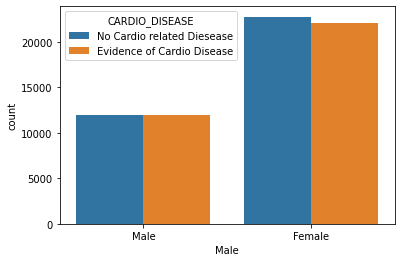

In [26]:
heart_df=values_entered.copy()
heart_df['GENDER']= heart_df['GENDER'].replace({1:'Female', 2:'Male'})
heart_df=heart_df.rename(columns={'GENDER':'Male'})
sns.countplot(data=heart_df,x='Male',hue='CARDIO_DISEASE')

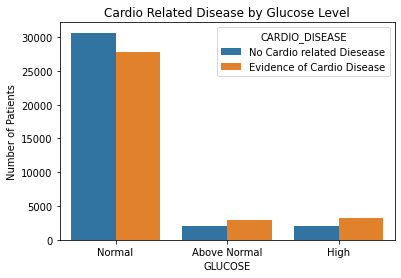

In [43]:
heart_df['GLUCOSE'] =heart_df['GLUCOSE']
sns.countplot(data=heart_df,x='GLUCOSE',hue='CARDIO_DISEASE')
plt.title("Cardio Related Disease by Glucose Level")
plt.ylabel("Number of Patients")
plt.savefig("Graphs/Glucose")
plt.show()

<AxesSubplot:>

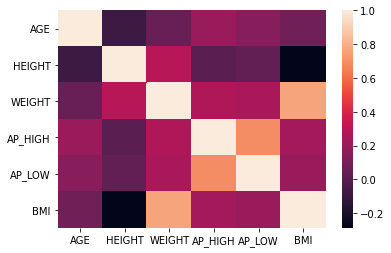

In [29]:
sns.heatmap(heart_df.corr())

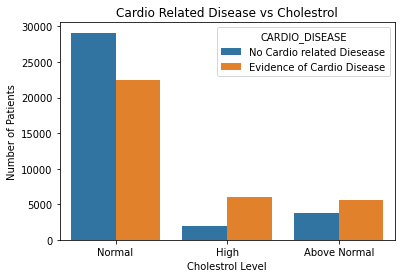

In [48]:
heart_df[['CHOLESTEROL']] = heart_df[['CHOLESTEROL']]
sns.countplot(data=heart_df,x='CHOLESTEROL',hue='CARDIO_DISEASE')
plt.title("Cardio Related Disease vs Cholestrol")
plt.ylabel("Number of Patients")
plt.xlabel("Cholestrol Level")
plt.savefig("Graphs/Cholestrol")
plt.show()

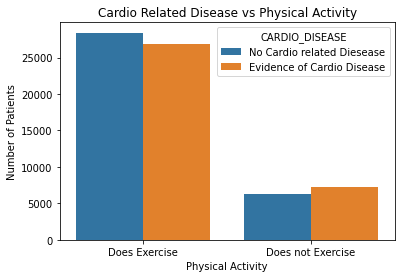

In [46]:
heart_df['PHYSICAL_ACTIVITY'] =heart_df['PHYSICAL_ACTIVITY']
sns.countplot(data=heart_df,x='PHYSICAL_ACTIVITY',hue='CARDIO_DISEASE')
plt.title("Cardio Related Disease vs Physical Activity")
plt.xlabel("Physical Activity")
plt.ylabel("Number of Patients")
plt.savefig("Graphs/PhysicalAct")
plt.show()

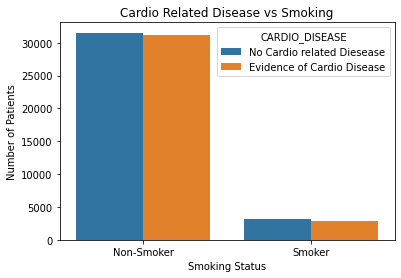

In [47]:
heart_df['SMOKE'] =heart_df['SMOKE']
sns.countplot(data=heart_df,x='SMOKE',hue='CARDIO_DISEASE')
plt.title("Cardio Related Disease vs Smoking")
plt.ylabel("Number of Patients")
plt.xlabel("Smoking Status")
plt.savefig("Graphs/Smoke")
plt.show()

In [41]:
heart_df['WEIGHT'] =heart_df['WEIGHT']
sns.distplot(heart_df,x='WEIGHT',kind="kde")

TypeError: distplot() got an unexpected keyword argument 'kind'

In [34]:
heart_df['AGE'] =heart_df['AGE']
# CARDIO_DISEASE = heart_df['CARDIO_DISEASE']
# sns.distplot(data=heart_df,x='AGE')
sns.distplot(heart_df,x='AGE', hue='CARDIO_DISEASE')

TypeError: distplot() got an unexpected keyword argument 'hue'

In [42]:
heart_df['BMI Range'] =heart_df['BMI Range']
sns.countplot(data=heart_df,x='BMI Range',hue='CARDIO_DISEASE')

KeyError: 'BMI Range'